In [2]:
import scipy
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat("./hw1data.mat")

x_data, y_data = np.squeeze(data['x']), np.squeeze(data['y'])

In this problem, we are given a set of data points $(x_i
, y_i)$, i = 1 ... 100. We wish to fit a
quadratic model,$ y_i = ax_i^2
 + bx_i + c + n_i$
, to the data. Here, $(a, b, c)$ are the parameters to
be determined and $n_i$
is the unknown observation noise. The $(x_i
, y_i)$ points are contained
in a file hw1data.mat available on the course webpage. You may load the data to MATLAB
using the command load hw1data and view them using scatter(x,y,’+’). Please use
the same data set and find the maximum likelihood estimate of $(a, b, c)$ assuming $n_i$ are
i.i.d., and


## Solution

Suppose that $ y_i = ax_i^2
 + bx_i + c + n_i$, where $n_i \sim N(0, \sigma^2)$

The maximum likelihood estimate of $y$ is to minimize the squared error by using [polyfit](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.polyfit.html)

$min \sum{\mid f(x_i) - y_i \mid^2}$

In [6]:
import numpy as np

params = np.polyfit(x_data, y_data, 2)
p2 = np.poly1d(params)

a,b,c = params
def f(x):
    return a * x**2 + b * x + c
print("Quadraic model fit")
print(params)

Quadraic model fit
[ 1.20214262e-02  3.12884593e+00 -4.23550089e+01]


## Plotting

Text(0.5,1,'Overlay')

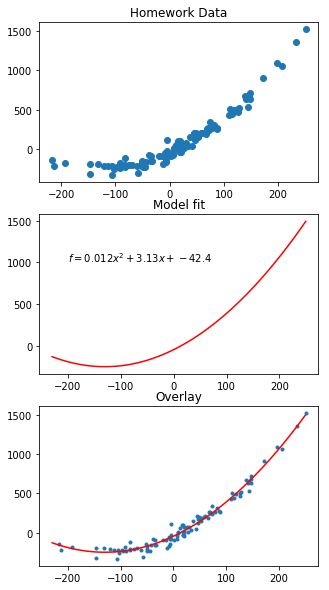

In [23]:
## Plotting
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(311)
ax1.scatter(x_data, y_data)
ax1.set_title('Homework Data')

xp = np.linspace(-230, 250, 100)
ax2 = fig.add_subplot(312)
ax2.plot(xp, f(xp), 'r-')
ax2.text(-200, 1000, f"$f = {a:.3} x^2 + {b:.3} x + {c:.3}$")
ax2.set_title('Model fit')

ax3 = fig.add_subplot(313)
ax3.plot(x_data, y_data, '.', xp, f(xp) , 'r-')
ax3.set_title('Overlay')